# Projet Data Mining

Données téléchargeable ici : https://github.com/d2ski/football-transfers-data/blob/main/dataset/transfers.csv

VINCENT Yann p1906701
TANG Kevin p1501263

In [ ]:
#imports

import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('transfers.csv', sep=',')

## Analyse initiale

In [ ]:
data

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23.0,...,1071,Wigan Athletic,England,18800000.0,NaN,False,False,False,False,310832
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21.0,...,687,Molde FK,Norway,4500000.0,1600000.0,False,False,False,False,319841
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20.0,...,40,FC Girondins Bordeaux,France,4000000.0,400000.0,False,False,False,False,315185
3,GB1,2009,s,985,Manchester United,England,in,1397,Michael Owen,29.0,...,762,Newcastle United,England,0.0,NaN,True,False,False,False,306421
4,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18.0,...,5242,Manchester United U18,England,NaN,NaN,False,False,False,False,339015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70001,NL1,2021,w,306,SC Heerenveen,Netherlands,in,257808,Runar Espejord,25.0,...,1293,Tromsø IL,Norway,NaN,500000.0,False,True,True,False,3071862
70002,NL1,2021,w,306,SC Heerenveen,Netherlands,in,580142,Joaquín Fernández,22.0,...,37535,Montevideo City Torque,Uruguay,NaN,100000.0,False,True,True,False,3268245
70003,NL1,2021,w,468,Sparta Rotterdam,Netherlands,in,340353,Maduka Okoye,22.0,...,1010,Watford FC,England,NaN,1000000.0,False,True,False,False,3619917
70004,NL1,2021,w,468,Sparta Rotterdam,Netherlands,left,340353,Maduka Okoye,22.0,...,1010,Watford FC,England,7000000.0,1000000.0,False,False,False,False,3619916


In [ ]:
# Transferts de Cristiano Ronaldo
data.loc[data['player_name'] == 'Cristiano Ronaldo']

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
12,GB1,2009,s,985,Manchester United,England,left,8198,Cristiano Ronaldo,24.0,...,418,Real Madrid,Spain,94000000.0,45000000.0,False,False,False,False,308498
10942,GB1,2021,s,985,Manchester United,England,in,8198,Cristiano Ronaldo,36.0,...,506,Juventus FC,Italy,15000000.0,45000000.0,False,False,False,False,3527714
11443,ES1,2009,s,418,Real Madrid,Spain,in,8198,Cristiano Ronaldo,24.0,...,985,Manchester United,England,94000000.0,45000000.0,False,False,False,False,308498
17390,ES1,2018,s,418,Real Madrid,Spain,left,8198,Cristiano Ronaldo,33.0,...,506,Juventus FC,Italy,117000000.0,45000000.0,False,False,False,False,2168965
32099,IT1,2018,s,506,Juventus FC,Italy,in,8198,Cristiano Ronaldo,33.0,...,418,Real Madrid,Spain,117000000.0,45000000.0,False,False,False,False,2168965
35294,IT1,2021,s,506,Juventus FC,Italy,left,8198,Cristiano Ronaldo,36.0,...,985,Manchester United,England,15000000.0,45000000.0,False,False,False,False,3527714


In [ ]:
# Transferts d'un joueur de 12 ans
data.loc[data['player_age'] == 12.0]

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
66684,NL1,2016,s,1269,PEC Zwolle,Netherlands,in,694038,Jamairo Appiah,12.0,...,515,Without Club,Without Club,NaN,NaN,False,False,False,False,2602688


In [ ]:
#Taille des données
nb_devis = data.shape[0]
nb_colonnes = data.shape[1]
print("Nombre de lignes :", nb_devis)
print("Nombre de variables :", nb_colonnes)

Nombre de lignes : 70006
Nombre de variables : 23


In [ ]:
data.columns

Index(['league', 'season', 'window', 'team_id', 'team_name', 'team_country',
       'dir', 'player_id', 'player_name', 'player_age', 'player_nation',
       'player_nation2', 'player_pos', 'counter_team_id', 'counter_team_name',
       'counter_team_country', 'transfer_fee_amnt', 'market_val_amnt',
       'is_free', 'is_loan', 'is_loan_end', 'is_retired', 'transfer_id'],
      dtype='object')

In [ ]:
data.dtypes

league                   object
season                    int64
window                   object
team_id                   int64
team_name                object
team_country             object
dir                      object
player_id                 int64
player_name              object
player_age              float64
player_nation            object
player_nation2           object
player_pos               object
counter_team_id          object
counter_team_name        object
counter_team_country     object
transfer_fee_amnt       float64
market_val_amnt         float64
is_free                    bool
is_loan                    bool
is_loan_end                bool
is_retired                 bool
transfer_id               int64
dtype: object

### Proportions

Text(0.5, 1.0, 'Ligue concernée par le transfert')

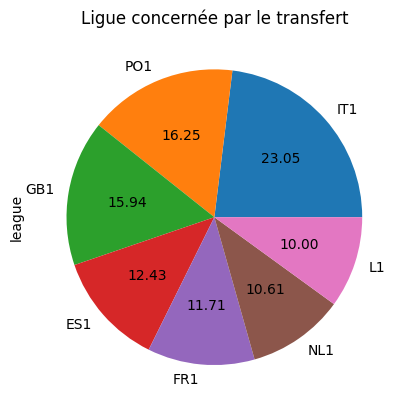

In [ ]:
data['league'].value_counts().plot.pie(autopct='%.2f')
plt.title('Ligue concernée par le transfert')

IT1 : Ligue 1 italienne

GB1 : Ligue 1 anglaise

FR1 : Ligue 1 française

ES1 : Ligue 1 espagnole

NL1 : Ligue 1 néerlandaise

PO1 : Ligue 1 portugaise

L1 : Ligue 1 allemande

Text(0.5, 1.0, 'Année du transfert')

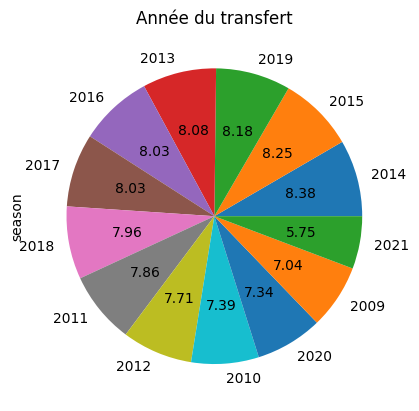

In [ ]:
data['season'].value_counts().plot.pie(autopct='%.2f')
plt.title('Année du transfert')

<Axes: ylabel='window'>

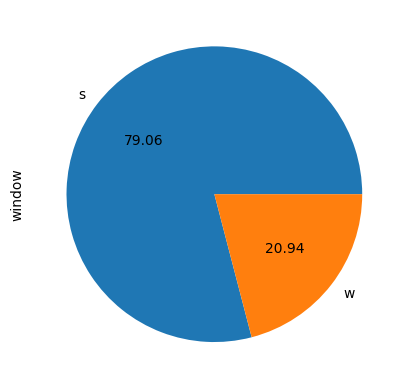

In [ ]:
data['window'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
data['team_name'].value_counts()

Genoa CFC                 1177
Parma FC                  1021
SL Benfica                 918
Atalanta BC                871
Udinese Calcio             854
                          ... 
Eintracht Braunschweig      20
Brentford FC                20
GFC Ajaccio                 19
CD Tenerife                 14
FC St. Pauli                12
Name: team_name, Length: 243, dtype: int64

<Axes: ylabel='team_country'>

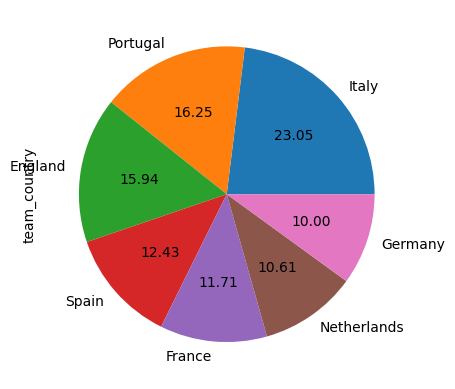

In [ ]:
data['team_country'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='dir'>

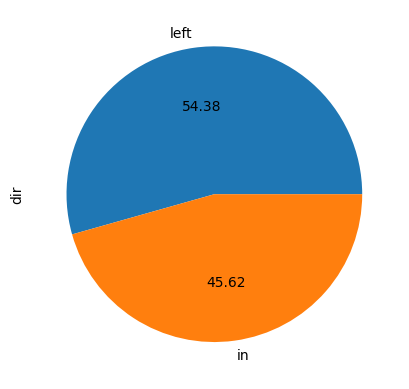

In [ ]:
data['dir'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='player_age'>

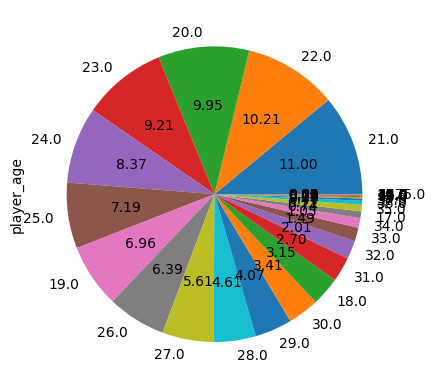

In [ ]:
data['player_age'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='player_nation'>

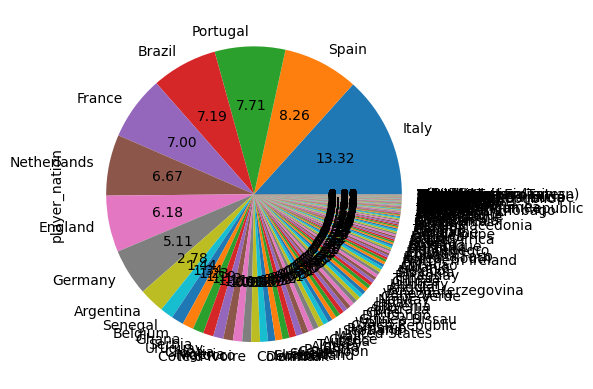

In [ ]:
data['player_nation'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='player_nation2'>

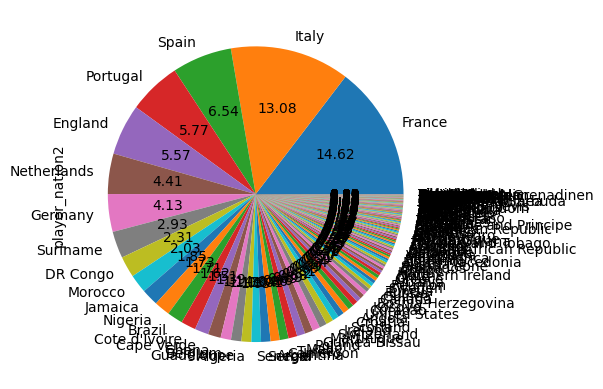

In [ ]:
data['player_nation2'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='player_pos'>

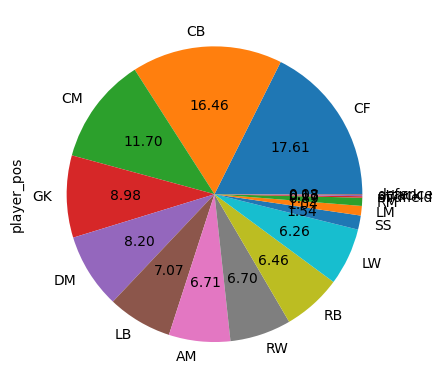

In [ ]:
data['player_pos'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Montant des transferts')

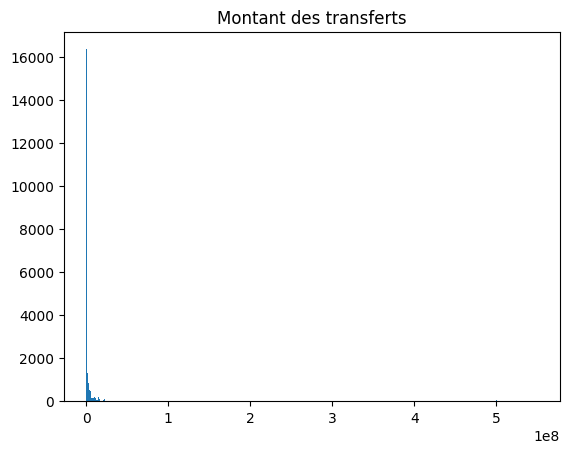

In [ ]:
plt.hist(data['transfer_fee_amnt'], bins=1000)
plt.title('Montant des transferts')

Text(0.5, 1.0, 'Montant des valeurs du marché')

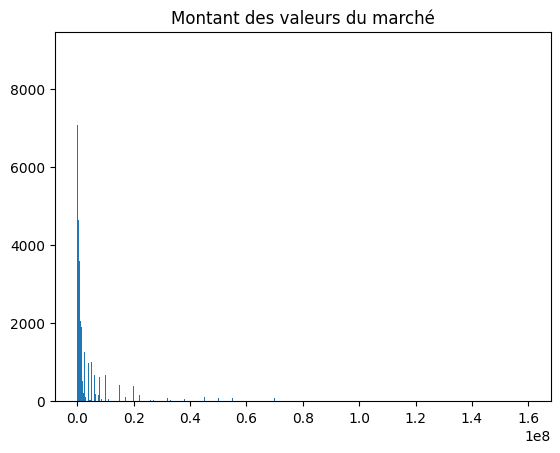

In [ ]:
plt.hist(data['market_val_amnt'], bins=1000)
plt.title('Montant des valeurs du marché')

<Axes: ylabel='is_free'>

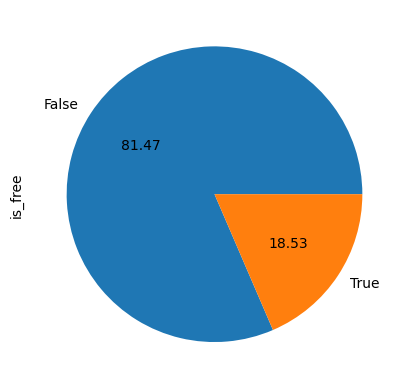

In [ ]:
data['is_free'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='is_loan'>

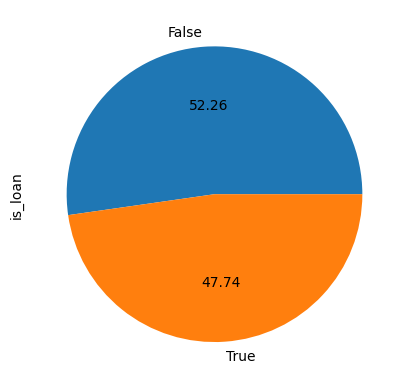

In [ ]:
data['is_loan'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='is_loan_end'>

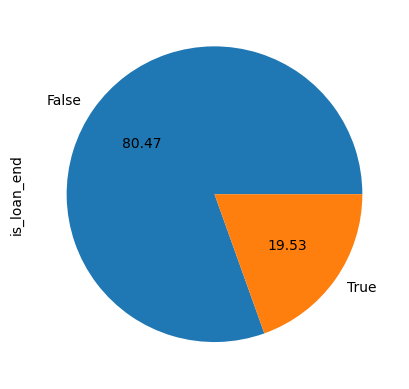

In [ ]:
data['is_loan_end'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='is_retired'>

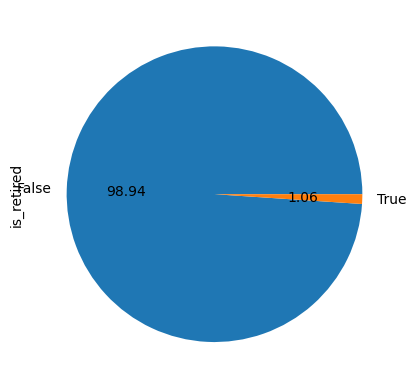

In [ ]:
data['is_retired'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
data.groupby(['league'])['transfer_fee_amnt'].sum().sort_values(ascending=False)


league
IT1    3.732923e+10
GB1    2.479891e+10
ES1    1.464766e+10
FR1    1.094465e+10
L1     1.082807e+10
PO1    4.752688e+09
NL1    3.030544e+09
Name: transfer_fee_amnt, dtype: float64

In [ ]:
data.groupby(['league'])['transfer_fee_amnt'].mean().sort_values(ascending=False)

league
GB1    6.290946e+06
IT1    5.850977e+06
ES1    3.982507e+06
FR1    3.125256e+06
L1     2.885178e+06
PO1    1.261329e+06
NL1    9.353531e+05
Name: transfer_fee_amnt, dtype: float64

## Utilisation de Gephi

In [ ]:
import networkx as nx

Reperage des données aberrantes

In [ ]:
data_sorted = data.sort_values(by='transfer_fee_amnt', ascending=False)

In [ ]:
data_sorted.head(50)

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
21001,IT1,2010,s,1627,Calcio Catania,Italy,left,41312,Simone Pesce,28.0,...,408,Ascoli Calcio 1898,Italy,550000000.0,200000.0,False,False,False,False,590135
22731,IT1,2011,s,252,Genoa CFC,Italy,in,91914,Davide Bertoncini,21.0,...,1408,Piacenza FC,Italy,550000000.0,300000.0,False,False,False,False,735935
20142,IT1,2009,s,130,Parma FC,Italy,left,28030,Luca Tedeschi,22.0,...,1103,Ternana Calcio,Italy,500000000.0,75000.0,False,False,False,False,3451466
21045,IT1,2010,s,1429,AC Cesena,Italy,left,199888,Caio De Cenco,21.0,...,10643,AC Bellaria Igea Marina,Italy,500000000.0,250000.0,False,False,False,False,743456
20719,IT1,2009,w,458,US Palermo,Italy,left,68862,Luca Di Matteo,21.0,...,2655,Vicenza Calcio,Italy,500000000.0,25000.0,False,False,False,False,389241
23793,IT1,2012,s,1627,Calcio Catania,Italy,left,233654,Francesco Fedato,19.0,...,332,AS Bari,Italy,500000000.0,150000.0,False,False,False,False,2263419
22176,IT1,2011,s,1429,AC Cesena,Italy,left,83374,Sacha Cori,22.0,...,4159,Carrarese Calcio 1908,Italy,500000000.0,275000.0,False,False,False,False,2456642
20774,IT1,2009,w,252,Genoa CFC,Italy,left,62270,Danilo Russo,22.0,...,2655,Vicenza Calcio,Italy,500000000.0,100000.0,False,False,False,False,380537
22087,IT1,2011,s,6195,SSC Napoli,Italy,in,21690,Daniele Mannini,27.0,...,1038,UC Sampdoria,Italy,500000000.0,NaN,False,False,False,False,590138
24136,IT1,2012,s,2921,Delfino Pescara 1936,Italy,in,164088,Luca Berardocco,21.0,...,4172,AC Pisa 1909,Italy,500000000.0,300000.0,False,False,False,False,734226


Prix trop élevé sur certains transferts

In [ ]:
data = data[data['transfer_fee_amnt'] <= 222000000.0]

In [ ]:
data_sorted = data.sort_values(by='transfer_fee_amnt', ascending=False)

In [ ]:
data_sorted.head(10)

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
48250,FR1,2017,s,583,Paris Saint-Germain,France,in,68290,Neymar,25.0,...,131,FC Barcelona,Spain,222000000.0,100000000.0,False,False,False,False,1866385
16321,ES1,2017,s,131,FC Barcelona,Spain,left,68290,Neymar,25.0,...,583,Paris Saint-Germain,France,222000000.0,100000000.0,False,False,False,False,1866385
48811,FR1,2018,s,162,AS Monaco,France,left,342229,Kylian Mbappé,19.0,...,583,Paris Saint-Germain,France,145000000.0,160000000.0,False,False,False,False,2101599
48916,FR1,2018,s,583,Paris Saint-Germain,France,in,342229,Kylian Mbappé,19.0,...,162,AS Monaco,France,145000000.0,160000000.0,False,False,False,False,2101599
16311,ES1,2017,s,131,FC Barcelona,Spain,in,288230,Ousmane Dembélé,20.0,...,16,Borussia Dortmund,Germany,135000000.0,50000000.0,False,False,False,False,1893861
16868,ES1,2017,w,131,FC Barcelona,Spain,in,80444,Philippe Coutinho,25.0,...,31,Liverpool FC,England,135000000.0,20000000.0,False,False,False,False,1993889
8333,GB1,2017,w,31,Liverpool FC,England,left,80444,Philippe Coutinho,25.0,...,131,FC Barcelona,Spain,135000000.0,20000000.0,False,False,False,False,1993889
40321,L1,2017,s,16,Borussia Dortmund,Germany,left,288230,Ousmane Dembélé,20.0,...,131,FC Barcelona,Spain,135000000.0,50000000.0,False,False,False,False,1893861
60146,PO1,2019,s,294,SL Benfica,Portugal,left,462250,João Félix,19.0,...,13,Atlético de Madrid,Spain,127200000.0,70000000.0,False,False,False,False,2536292
17866,ES1,2019,s,13,Atlético de Madrid,Spain,in,462250,João Félix,19.0,...,294,SL Benfica,Portugal,127200000.0,70000000.0,False,False,False,False,2536292


Graph avec poids sur sommes des transferts

In [ ]:
# Créez un graphe dirigé
G = nx.DiGraph()

# Parcourez les données et ajoutez des nœuds avec l'attribut "country"
for index, row in data.iterrows():
    if row['dir'] == 'in':
        team_name = row['team_name']
        team_country = row['team_country']
        #print(team_name,league)
    else:
        team_name = row['counter_team_name']
        team_country = row['counter_team_country']

    #print(team_name,team_country,row['dir'])

    if not G.has_node(team_name):  # Vérifiez si le nœud existe déjà
        G.add_node(team_name, team_country=team_country)


# Parcourez à nouveau les données et ajoutez les arêtes avec les poids
for index, row in data.iterrows():
    if row['dir'] == 'in':
        source = row['counter_team_name']
        target = row['team_name']
    else:
        source = row['team_name']
        target = row['counter_team_name']

    transfer_fee = row['transfer_fee_amnt']  # Récupérez le prix du transfert depuis la colonne

        # Vérifiez si l'arête existe déjà
    if G.has_edge(source, target):
        # Si l'arête existe déjà, ajoutez simplement le montant du transfert au poids existant
        G[source][target]['weight'] += transfer_fee
    else:
        # Sinon, ajoutez une nouvelle arête avec le montant du transfert spécifié
        G.add_edge(source, target, weight=transfer_fee)

# Divisez tous les poids des liens par 2
for edge in G.edges:
    G[edge[0]][edge[1]]['weight'] /= 2

nx.write_gexf(G, "transfersSum.gexf")


In [ ]:
dataTeamC = data.groupby(['team_name', 'counter_team_name','dir']).size().reset_index(name='count')

In [ ]:
# dataTeamC par ordre croissant sur le count
dataTeamC.sort_values(by='count', ascending=False)

,team_name,counter_team_name,dir,count
8891,Genoa CFC,AC Milan,left,16
597,AC Milan,Genoa CFC,in,16
10505,Juventus FC,Cagliari Calcio,left,12
19115,Udinese Calcio,Juventus FC,left,12
10637,Juventus FC,Udinese Calcio,in,12
...,...,...,...,...
7763,FC Porto,Fulham FC,left,1
7762,FC Porto,Fluminense Football Club,left,1
7761,FC Porto,Feyenoord Rotterdam,in,1
7760,FC Porto,Fenerbahce SK,left,1


In [ ]:
# Créez un graphe dirigé
G = nx.DiGraph()

# Parcourez les données et ajoutez des nœuds avec l'attribut "country"
for index, row in data.iterrows():
    if row['dir'] == 'in':
        team_name = row['team_name']
        team_country = row['team_country']
    else:
        team_name = row['counter_team_name']
        team_country = row['counter_team_country']

    if not G.has_node(team_name):  # Vérifiez si le nœud existe déjà
        G.add_node(team_name, team_country=team_country)


# Parcourez à nouveau les données et ajoutez les arêtes avec les poids
for index, row in dataTeamC.iterrows():
    if row['dir'] == 'in':
        source = row['counter_team_name']
        target = row['team_name']
    else:
        source = row['team_name']
        target = row['counter_team_name']

    count = row['count']  # Récupérez le prix du transfert depuis la colonne

    if not G.has_edge(source, target):
      G.add_edge(source, target, weight=count)

nx.write_gexf(G, "transfersCount.gexf")

In [ ]:
# Créez un DataFrame groupé pour stocker le montant total des transferts et le nombre de transferts
dataTeamC_Tot = data.groupby(['team_name', 'counter_team_name', 'dir']).agg({'transfer_fee_amnt': ['size', 'sum']}).reset_index()

# Renommez les colonnes agrégées
dataTeamC_Tot.columns = ['team_name', 'counter_team_name', 'dir', 'count', 'total_fee']


In [ ]:
dataTeamC_Tot.sort_values(by='count', ascending=False)

,team_name,counter_team_name,dir,count,total_fee
8891,Genoa CFC,AC Milan,left,16,130800000.0
597,AC Milan,Genoa CFC,in,16,130800000.0
10505,Juventus FC,Cagliari Calcio,left,12,31590000.0
19115,Udinese Calcio,Juventus FC,left,12,80000000.0
10637,Juventus FC,Udinese Calcio,in,12,80000000.0
...,...,...,...,...,...
7763,FC Porto,Fulham FC,left,1,0.0
7762,FC Porto,Fluminense Football Club,left,1,2120000.0
7761,FC Porto,Feyenoord Rotterdam,in,1,7700000.0
7760,FC Porto,Fenerbahce SK,left,1,0.0


In [ ]:
# Créez un graphe dirigé
G = nx.DiGraph()

# Parcourez les données et ajoutez des nœuds avec l'attribut "country"
for index, row in data.iterrows():
    if row['dir'] == 'in':
        team_name = row['team_name']
        team_country = row['team_country']
    else:
        team_name = row['counter_team_name']
        team_country = row['counter_team_country']

    if not G.has_node(team_name):  # Vérifiez si le nœud existe déjà
        G.add_node(team_name, team_country=team_country)


# Parcourez à nouveau les données et ajoutez les arêtes avec les poids
for index, row in dataTeamC_Tot.iterrows():
    if row['dir'] == 'in':
        source = row['counter_team_name']
        target = row['team_name']
    else:
        source = row['team_name']
        target = row['counter_team_name']

    count = row['count']  # Récupérez le prix du transfert depuis la colonne
    total_fee = row['total_fee']  # Récupérez le montant total des transferts depuis la colonne

    if not G.has_edge(source, target):
      weight = total_fee / count
      G.add_edge(source, target, weight=weight)

nx.write_gexf(G, "transfersFee_Count.gexf")

In [ ]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne 'transfer_fee_amnt'
data = data.dropna(subset=['transfer_fee_amnt'])

# Calculer la moyenne des montants de transfert par poste
average_transfer_fee_by_position = data.groupby('player_pos')['transfer_fee_amnt'].mean()

# Trier les postes par montant moyen de transfert de la plus élevée à la plus basse
ranked_positions = average_transfer_fee_by_position.sort_values(ascending=False)

ranked_positions

player_pos
LW          4.398217e+06
SS          4.396624e+06
CF          4.099109e+06
RW          3.914799e+06
AM          3.613273e+06
CM          3.384210e+06
DM          2.908385e+06
CB          2.796614e+06
RB          2.534551e+06
LM          2.401207e+06
LB          2.181835e+06
GK          1.380104e+06
RM          1.357840e+06
attack      1.020833e+05
midfield    1.185185e+04
defence     0.000000e+00
Name: transfer_fee_amnt, dtype: float64

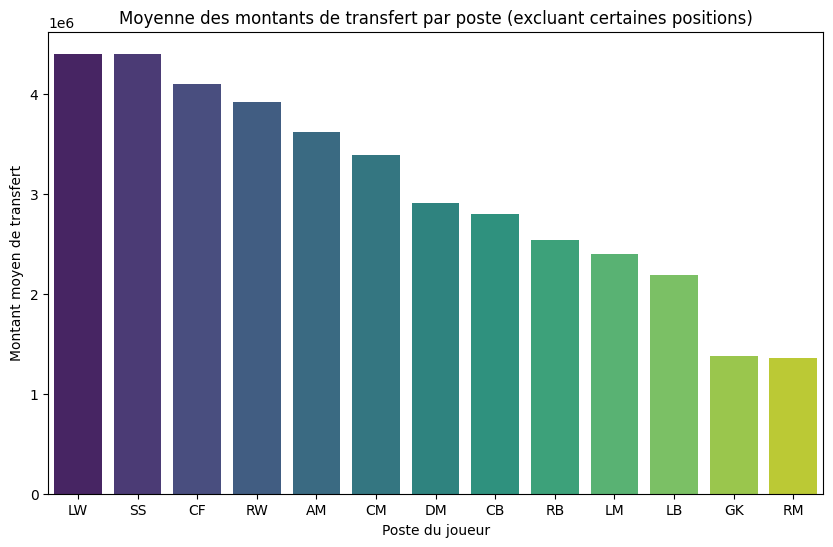

In [ ]:
import seaborn as sns

# Supprimer les lignes avec des valeurs manquantes dans la colonne 'transfer_fee_amnt'
data = data.dropna(subset=['transfer_fee_amnt'])

# Exclure certaines positions (attack, midfield, defence)
excluded_positions = ['attack', 'midfield', 'defence']
filtered_data = data[~data['player_pos'].isin(excluded_positions)]

# Calculer la moyenne des montants de transfert par poste
average_transfer_fee_by_position = filtered_data.groupby('player_pos')['transfer_fee_amnt'].mean()

# Trier les postes par montant moyen de transfert de la plus élevée à la plus basse
ranked_positions = average_transfer_fee_by_position.sort_values(ascending=False)

# Créer une figure et des axes
plt.figure(figsize=(10, 6))

# Tracer une courbe avec les postes sur l'axe des x et les montants moyens de transfert sur l'axe des y
sns.barplot(x=ranked_positions.index, y=ranked_positions.values, palette='viridis')

# Ajouter des titres et des étiquettes
plt.title('Moyenne des montants de transfert par poste (excluant certaines positions)')
plt.xlabel('Poste du joueur')
plt.ylabel('Montant moyen de transfert')

# Afficher le graphique
plt.show()



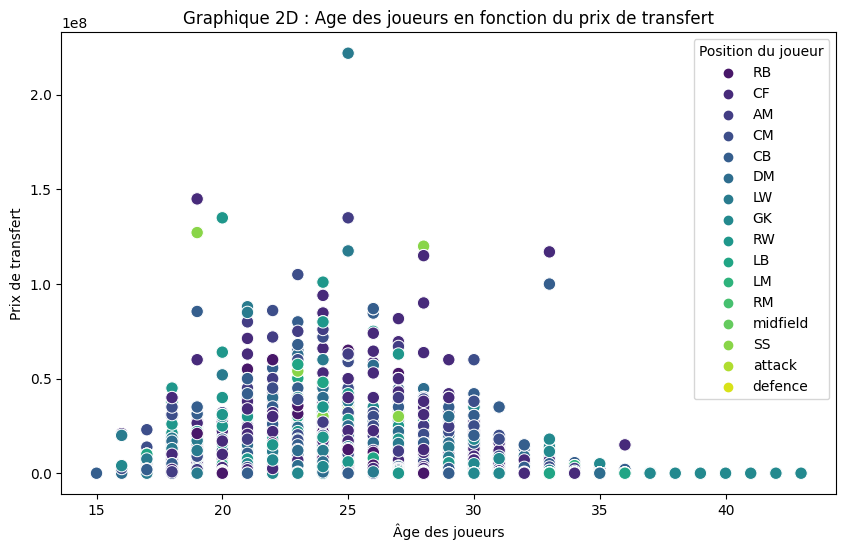

In [ ]:
# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'transfer_fee_amnt' et 'player_age'
data = data.dropna(subset=['transfer_fee_amnt', 'player_age'])

# Créer un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='player_age', y='transfer_fee_amnt', data=data, hue='player_pos', palette='viridis', s=80)

# Ajouter des titres et des étiquettes
plt.title('Graphique 2D : Age des joueurs en fonction du prix de transfert')
plt.xlabel('Âge des joueurs')
plt.ylabel('Prix de transfert')

# Afficher la légende
plt.legend(title='Position du joueur')

# Afficher le graphique
plt.show()


<ipython-input-91-ffbf50af628f>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='season', y='transfer_fee_amnt', data=data, ci=None, estimator='mean')


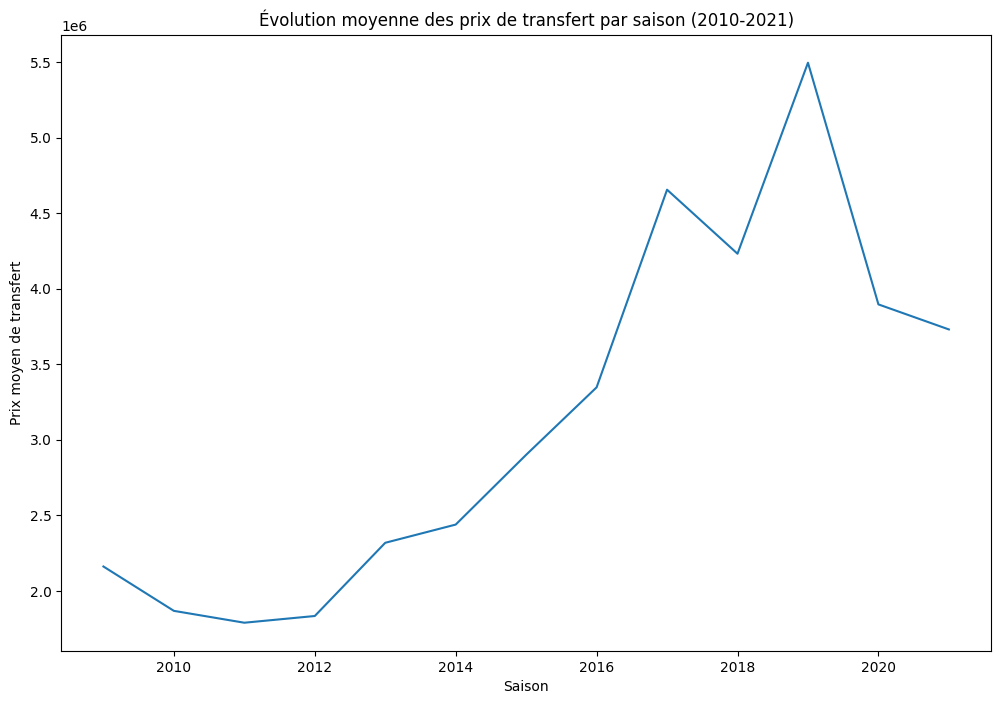

In [ ]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne 'transfer_fee_amnt' et 'season'
data = data.dropna(subset=['transfer_fee_amnt', 'season'])

# Créer un line plot avec la moyenne des prix de transfert pour chaque saison
plt.figure(figsize=(12, 8))
sns.lineplot(x='season', y='transfer_fee_amnt', data=data, ci=None, estimator='mean')

# Ajouter des titres et des étiquettes
plt.title('Évolution moyenne des prix de transfert par saison (2010-2021)')
plt.xlabel('Saison')
plt.ylabel('Prix moyen de transfert')

# Afficher le graphique
plt.show()
